# History analysis of Population process

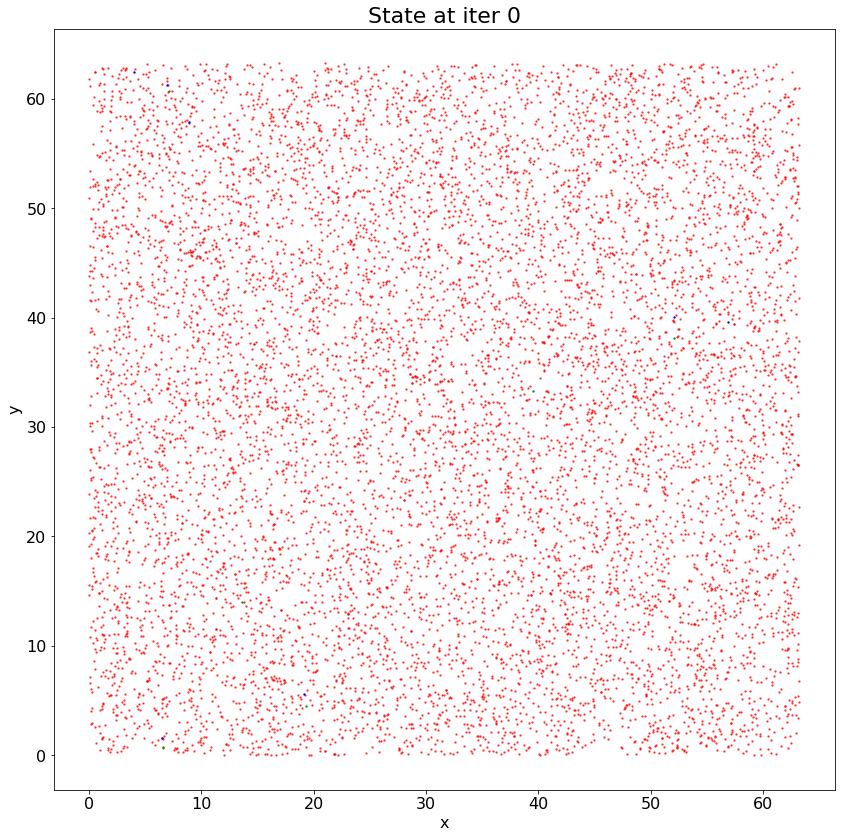

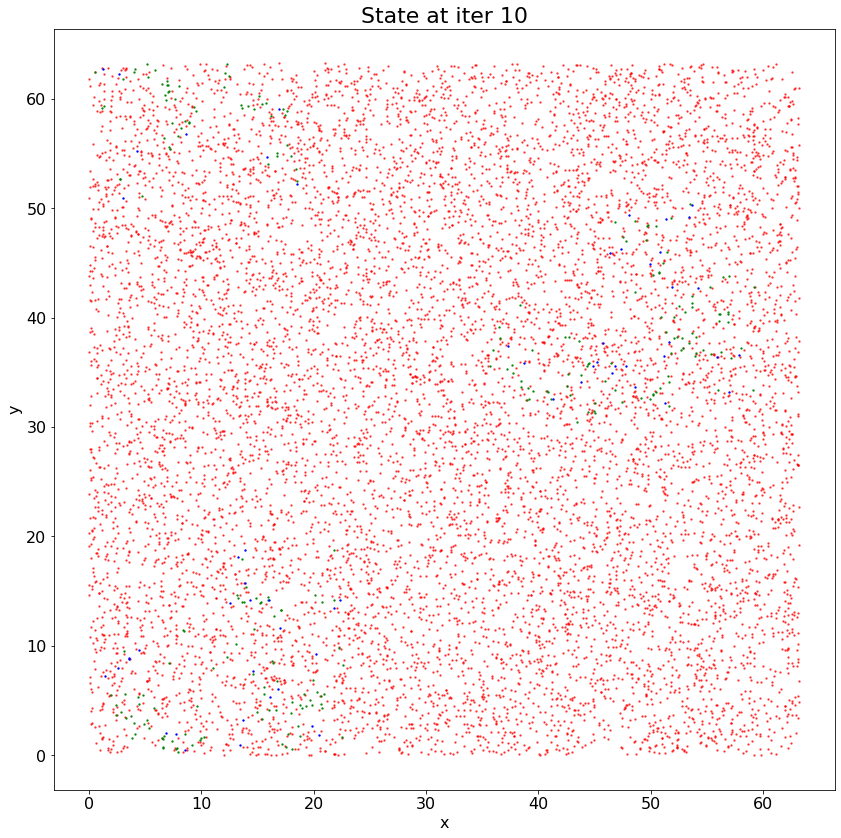

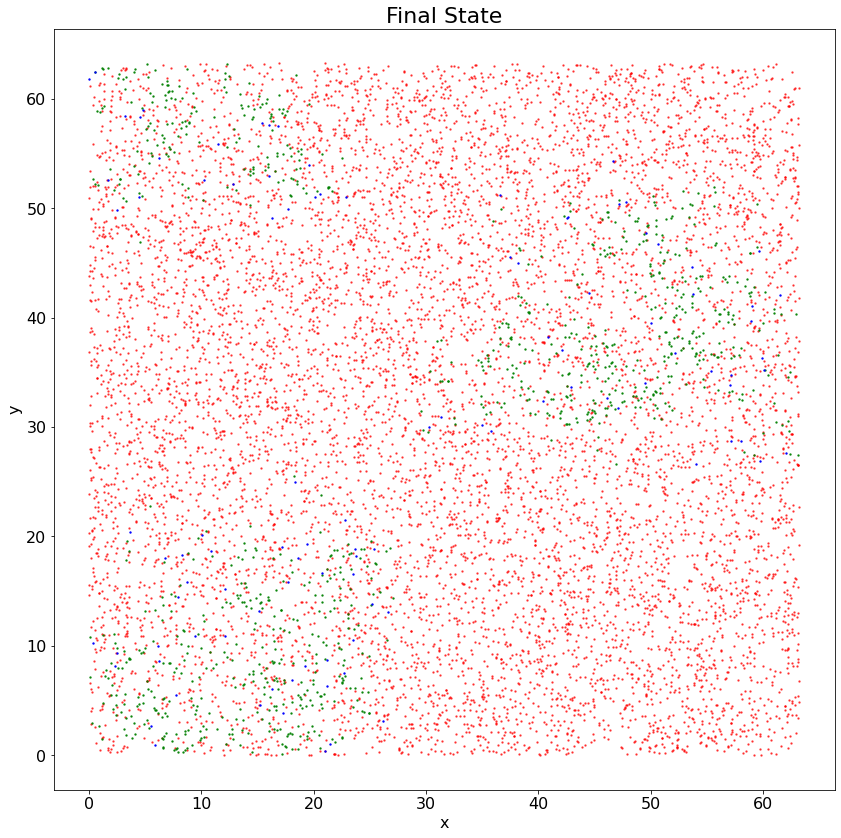

In [16]:
from time import time

import numpy as np

from numpy import array, dot, exp, sqrt
from numpy.random import rand, seed
from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance

import matplotlib.pyplot as plt
import matplotlib

import pandas as pd

# load data
fState = "data/sim10k/history/pop_state_final.csv"
fLocs = "data/sim10k/history/pop_locs_final.csv"

state = np.loadtxt(fState)
locs = np.loadtxt(fLocs)


def draw_state(mState, caption):
    # add figure
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize=(14, 14))
    ax = fig.add_subplot(111)

    panels = locs[mState == 1]
    empty = locs[mState == 0]
    new = locs[mState == 2]

    ax.scatter(empty[:,0], empty[:,1], color='red', s=2, alpha=0.6)
    ax.scatter(panels[:,0], panels[:,1], color='green', s=2, alpha=0.8)
    ax.scatter(new[:,0], new[:,1], color='blue', s=2, alpha=0.9)
    plt.title(caption, size=22)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


inter_states = [0, 10]
for i in inter_states:
    f = "data/sim10k/history/pop_state_%d.csv" % i
    s = np.loadtxt(f)
    draw_state(s, "State at iter %d" % i)

draw_state(state, "Final State")






In [ ]:
# load data
fState = "data/sim1000k/pop_state.csv"
fLocs = "data/sim1000k/pop_locs.csv"

state = np.loadtxt(fState)
locs = np.loadtxt(fLocs)

# Final density of the state
print("Final Density:")
print(np.sum(state >=1) / state.size)

# computing the fractal dimension
#considering only scales in a logarithmic list
import numpy as np

data = locs[np.logical_or(state==1, state==2)]
Lx = L
Ly = L

start = np.log10(L * 1./2**8)
end = np.log10(L * 1./2**13)

scales=np.logspace(start, end, 10)
Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(data, bins=(np.arange(0,Lx+scale/2,scale),np.arange(0,Ly+scale/2,scale)))
    Ns.append(np.sum(H>0))

eps = scales
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(eps)[:2], np.log(Ns)[:2], 1)
 
plt.plot(np.log(eps),np.log(Ns), 'o', mfc='none')
plt.plot(np.log(eps), np.polyval(coeffs,np.log(eps)))
plt.xlabel('log $\epsilon$')
plt.ylabel('log N')
plt.axis("equal")
 
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient

# plot subarea
# add figure
N = state.size
L = 20 * sqrt(N / 1000)

matplotlib.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(14, 14))
ax = fig.add_subplot(111)

upper = L/3
lower = L/4
inner_cond = np.prod(np.logical_and(locs < upper, locs > lower), axis=1)

panels = locs[np.logical_and(inner_cond, state == 1)]
empty = locs[np.logical_and(inner_cond, state == 0)]
new = locs[np.logical_and(inner_cond, state == 2)]

ax.scatter(empty[:,0], empty[:,1], color='red', s=2, alpha=0.3)
ax.scatter(panels[:,0], panels[:,1], color='green', s=2, alpha=0.9)
ax.scatter(new[:,0], new[:,1], color='blue', s=2, alpha=0.6)
plt.title("Final state (GeoData)", size=22)
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')

rectangle1 = plt.Rectangle((180,180), scales[0], scales[0], fc=(0, 0, 0, 0), ec="red")
rectangle2 = plt.Rectangle((180,180), scales[1], scales[1], fc=(0, 0, 0, 0), ec="red")
plt.gca().add_patch(rectangle1)
plt.gca().add_patch(rectangle2)

plt.show()

# free Mem
state = []
locs = []